<a href="https://colab.research.google.com/github/Hemanthkumar2143/Generative_AI_2303A52143/blob/main/CNN_MNIST_2143.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [7]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to match CNN input shape (batch, height, width, channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [8]:
# Build CNN model based on the provided architecture
model = Sequential([
    Conv2D(33, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 digit classes
])


In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/30
1875/1875 - 57s - 30ms/step - accuracy: 0.9611 - loss: 0.1268 - val_accuracy: 0.9879 - val_loss: 0.0384
Epoch 2/30
1875/1875 - 57s - 30ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9900 - val_loss: 0.0304
Epoch 3/30
1875/1875 - 81s - 43ms/step - accuracy: 0.9912 - loss: 0.0268 - val_accuracy: 0.9877 - val_loss: 0.0360
Epoch 4/30
1875/1875 - 80s - 43ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 5/30
1875/1875 - 84s - 45ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9925 - val_loss: 0.0255
Epoch 6/30
1875/1875 - 54s - 29ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9910 - val_loss: 0.0324
Epoch 7/30
1875/1875 - 84s - 45ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9899 - val_loss: 0.0411
Epoch 8/30
1875/1875 - 79s - 42ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 9/30
1875/1875 - 82s - 44ms/step - accuracy: 0.9979 - loss: 0.0062 - val_a

In [10]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f" Training Accuracy: {train_acc * 100:.2f}%")
print(f" Testing Accuracy: {test_acc * 100:.2f}%")


 Training Accuracy: 99.91%
 Testing Accuracy: 99.13%


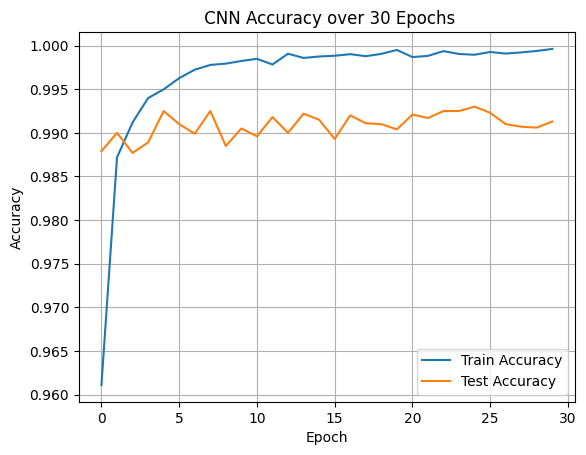

In [11]:
# Plotting accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(' CNN Accuracy over 30 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
